<a href="https://colab.research.google.com/github/HimashiRathnayake/Segmentation-With-Inter-Means-Algorithm/blob/main/Segmentation_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Segmentation with Inter-means Algorithm**

**Dependencies**

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Image**

In [3]:
def load_image(image_name):
  image_file_path = "/content/drive/Shareddrives/Other/Computer Vision/Images/"+ image_name
  image = cv.imread(image_file_path)
  if image is None:
      sys.exit("Could not read the image.")
  return image

**Convert to Gray Scale**

In [4]:
def convert_to_gray_scale(rgb_image):
  r, g, b = rgb_image[:,:,0], rgb_image[:,:,1], rgb_image[:,:,2]
  gray_image = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray_image

**Get Mean Value**

In [5]:
def get_average_intensity(image_array):
  sum = 0
  count = 0

  for pixel in image_array:
      sum += pixel
      count += 1

  return sum/count

**Partition By Threshold**

In [6]:
def partition_by_threshold(image_array, init_threshold):
  part_1 = []
  part_2 = []

  for pixel in image_array:
      if (pixel <= init_threshold):
        part_1.append(pixel)
      else:
        part_2.append(pixel)

  return part_1, part_2

**Apply Inter-mean Algorithm**

In [14]:
def apply_inter_mean(image_name):
  image = load_image(image_name)
  print("Original Image : ")
  cv2_imshow(image)

  gray_scaled_image = convert_to_gray_scale(image)
  print("\nGray Scaled Image : ")
  cv2_imshow(gray_scaled_image)

  image_array = [i for element in gray_scaled_image for i in element]  # flattern image to array

  init_threshold = get_average_intensity(image_array)
  print("\nInitial Threshold : ", init_threshold)

  count = 1
  threshold_array = [init_threshold]

  while (True):

    part_1, part_2 = partition_by_threshold(image_array, threshold_array[-1])
    # print(len(part_1), len(part_2))

    part_1_avg = get_average_intensity(part_1)
    part_2_avg = get_average_intensity(part_2)
    # print(part_1_avg, part_2_avg)

    new_threshold = 1/2 * (part_1_avg + part_2_avg)
    print("New Threshold After Iteration ", count, " : ", new_threshold)
    
    if (new_threshold == threshold_array[-1]):
      print("Converged!")
      print("Final Treshold : ", new_threshold)
      break

    elif (new_threshold in threshold_array[:-1]):
      print("Bouncing...")
      break

    threshold_array.append(new_threshold)

    count += 1

  return gray_scaled_image, new_threshold

**Segmentation**

In [15]:
def segmentate_image(image, threshold):
  final_image = image.copy()
  rows_count = len(image)
  columns_count = len(image[0])
  for i in range(rows_count):
    for j in range(columns_count):
      if (image[i,j] <= threshold):
        final_image[i,j] = 0
      else:
        final_image[i,j] = 255
  return final_image

**Get Segmented Image**

Original Image : 


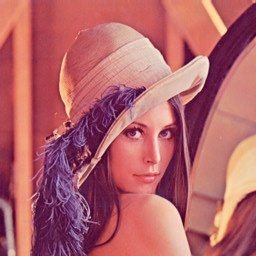


Gray Scaled Image : 


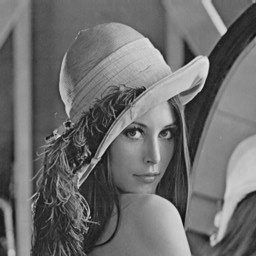


Initial Threshold :  110.22860540161132
New Threshold After Iteration  1  :  109.88349924747632
New Threshold After Iteration  2  :  109.66631599282331
New Threshold After Iteration  3  :  109.5405533525111
New Threshold After Iteration  4  :  109.47766432108078
New Threshold After Iteration  5  :  109.42849242811263
New Threshold After Iteration  6  :  109.37588545506222
New Threshold After Iteration  7  :  109.3084032356123
New Threshold After Iteration  8  :  109.27637473522869
New Threshold After Iteration  9  :  109.25235228409987
New Threshold After Iteration  10  :  109.23633673833282
New Threshold After Iteration  11  :  109.21917665952492
New Threshold After Iteration  12  :  109.19400725071515
New Threshold After Iteration  13  :  109.17798965801592
New Threshold After Iteration  14  :  109.17226897155078
New Threshold After Iteration  15  :  109.17112483795876
New Threshold After Iteration  16  :  109.17112483795876
Converged!
Final Treshold :  109.17112483795876

Final Seg

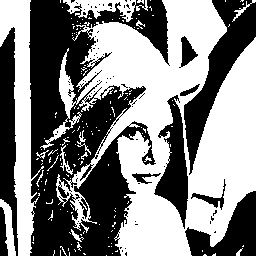

In [16]:
gray_image, threshold = apply_inter_mean("test.jpeg")
new_image = segmentate_image(gray_image, threshold)
print("\nFinal Segmented Image : ")
cv2_imshow(new_image)